In [2]:
from App.Controller import Controller
c = Controller()
c.load_data_set('Files/dataset.csv')
c.datahandler.preprocess_data()
print(c.datahandler.pre_processed_statistic)


Processed missing rows count: 0,        
Removed duplicates count: 0.,
Removed outliers count: 0


In [3]:
X, X_test, Y, Y_test = c.datahandler.split_data_into_train_and_testing_sets()
print(X.shape)
print(X_test.shape)
print(Y.shape)
print(Y_test.shape)

(4768, 8)
(2044, 8)
(4768, 3)
(2044, 3)


In [4]:
c.predictor.fit(X,Y)
y_predict = c.predictor.predict(X_test)
r2_score = c.predictor.calc_r2_score(Y_test, y_predict)

In [5]:
print(c.get_condidence_interval_description(r2_score, X_test.shape[0], 0.99))
print(c.get_condidence_interval_description(r2_score, X_test.shape[0], 0.98))
print(c.get_condidence_interval_description(r2_score, X_test.shape[0], 0.95))
print(c.get_condidence_interval_description(r2_score, X_test.shape[0], 0.9))

99.0% доверительный интервал для r^2 = 0.8883 +/- 0.0162
98.0% доверительный интервал для r^2 = 0.8883 +/- 0.0143
95.0% доверительный интервал для r^2 = 0.8883 +/- 0.0115
90.0% доверительный интервал для r^2 = 0.8883 +/- 0.0089


In [12]:
varied_X_test = c.loader.random_vary_input_data(X_test, 10)
varued_y_predict = c.predictor.predict(varied_X_test)
r2_score_var = c.predictor.calc_r2_score(Y_test, varued_y_predict)

In [13]:
print(c.get_condidence_interval_description(r2_score_var, X_test.shape[0], 0.99))
print(c.get_condidence_interval_description(r2_score_var, X_test.shape[0], 0.98))
print(c.get_condidence_interval_description(r2_score_var, X_test.shape[0], 0.95))
print(c.get_condidence_interval_description(r2_score_var, X_test.shape[0], 0.9))

99.0% доверительный интервал для r^2 = 0.8883 +/- 0.0162
98.0% доверительный интервал для r^2 = 0.8883 +/- 0.0143
95.0% доверительный интервал для r^2 = 0.8883 +/- 0.0115
90.0% доверительный интервал для r^2 = 0.8883 +/- 0.0089


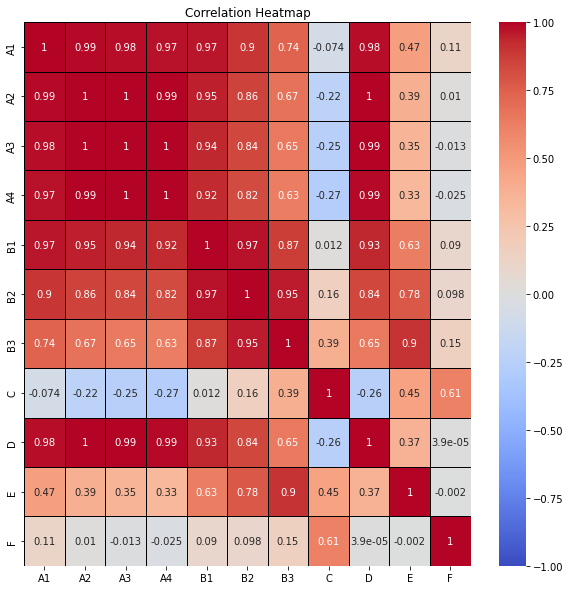

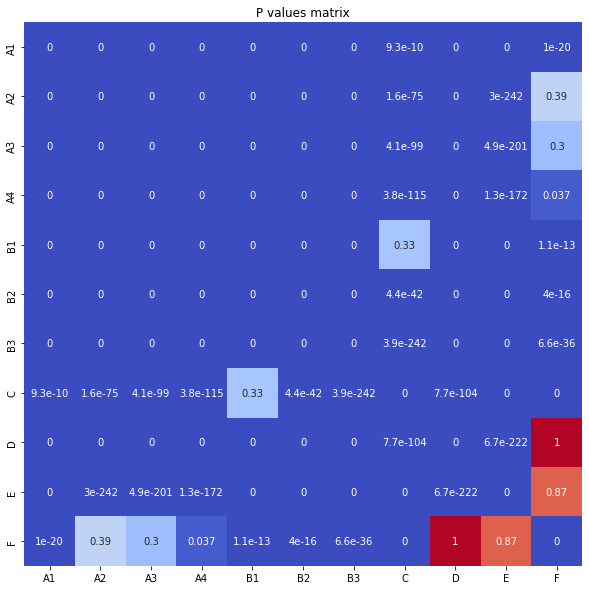

In [22]:
correlation_matrix, p_values_matrix = c.datahandler.correlation_data
c.analyzer.plot_correlation_matrix(correlation_matrix)
c.analyzer.plot_p_values_matrix(p_values_matrix)

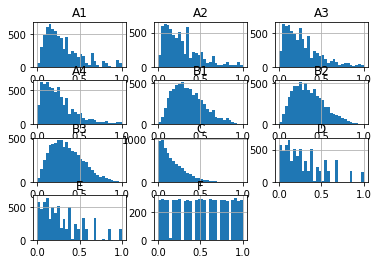

In [4]:
c.analyzer.plot_params_histograms(c.datahandler.dataframe)

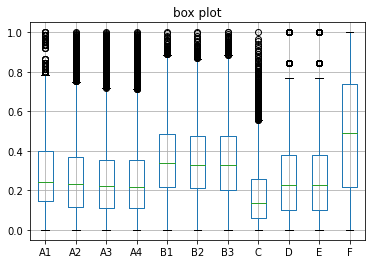

In [12]:
c.analyzer.box_plot(c.datahandler.dataframe)

c:\Users\Krotiara\PycharmProjects\tuboscan_task\App\DataAnalyzer.py:45: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  scatter_matrix(data, diagonal="kde", ax=ax)


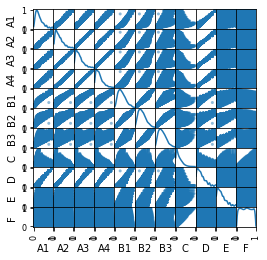

In [7]:
c.analyzer.plot_scatter_matrix(c.datahandler.dataframe)

In [ ]:
c.analyzer.plot_correlation_statistic(*c.datahandler.correlation_data)

In [ ]:
import matplotlib.pyplot as plt
d_predict = [row[0] for row in y_predict]
d_true = [row[0] for row in Y_test.values]

plt.plot(range(len(d_predict)),d_predict,'b',label="predict")
plt.plot(range(len(d_true)),d_true,'r',label="test")

In [ ]:
import matplotlib.pyplot as plt
e_predict = [row[1] for row in y_predict]
e_true = [row[1] for row in Y_test.values]

plt.plot(range(len(e_predict)),e_predict,'b',label="predict")
plt.plot(range(len(e_true)),e_true,'r',label="test")

In [ ]:
import matplotlib.pyplot as plt
f_predict = [row[2] for row in y_predict]
f_true = [row[2] for row in Y_test.values]

plt.plot(range(len(f_predict)),f_predict,'b',label="predict")
plt.plot(range(len(f_true)),f_true,'r',label="test")

In [ ]:
c.analyzer.profile_data(c.datahandler.dataframe)